In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns',10)# 指定最多显示的列数
plt.rcParams['font.sans-serif']=['SimHei'] # 设置字体为黑体
plt.rcParams['axes.unicode_minus'] = False # 让坐标轴能显示负数

# 数据来源
* 这是一个基于社交网络的网站的用户签到的数据集，来自斯坦福大学网站。
* 从2009年2月到2010年10月总共收集了6442890个签到记录（个人电脑配置有限，只选取了其中80万进行分析）。
* 数据下载地址：https://snap.stanford.edu/data/loc-gowalla.html

* 各列名
    * user：用户名
    * check_in_time：签到时间
    * latitude：维度
    * longitude：经度
    


In [3]:
nets=pd.read_table('D:/11/gps/loc-gowalla_totalCheckins/Gowalla_totalCheckins.txt',header=None,names=['user','check_in_time','latitude','longitude','location_id'])

In [4]:
nets.head()

,user,check_in_time,latitude,longitude,location_id
0,0,2010-10-19T23:55:27Z,30.235909,-97.795140,22847
1,0,2010-10-18T22:17:43Z,30.269103,-97.749395,420315
2,0,2010-10-17T23:42:03Z,30.255731,-97.763386,316637
3,0,2010-10-17T19:26:05Z,30.263418,-97.757597,16516
4,0,2010-10-16T18:50:42Z,30.274292,-97.740523,5535878


In [5]:
nets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6442892 entries, 0 to 6442891
Data columns (total 5 columns):
user             int64
check_in_time    object
latitude         float64
longitude        float64
location_id      int64
dtypes: float64(2), int64(2), object(1)
memory usage: 221.2+ MB


In [6]:
nets.isnull().sum()

user             0
check_in_time    0
latitude         0
longitude        0
location_id      0
dtype: int64

In [7]:
demos=nets.sample(n=800000)

In [8]:
demos['hour']=pd.to_datetime(demos['check_in_time']).dt.hour# 签到-小时（24小时制）

In [9]:
demos['day']=pd.to_datetime(demos['check_in_time']).dt.date.astype('datetime64[D]')# 签到-日期

In [10]:
#nets['monthes']=pd.to_datetime(nets['check_in_time']).dt.month

In [11]:
demos['month']=demos['day'].astype('datetime64[M]')# 签到-月份

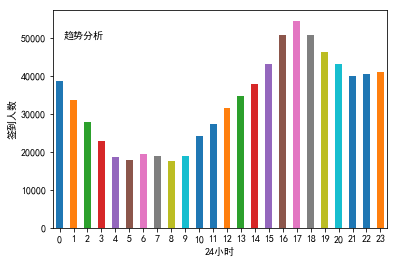

In [12]:
demos.hour.value_counts(sort=False).plot.bar(rot=0)
plt.xlabel('24小时')
plt.ylabel('签到人数')
plt.text(0.3,50000,'趋势分析',fontproperties='SimHei',fontsize=10)
plt.savefig('各个时刻签到人数',dpi=300,bbox_inches='tight')

In [13]:
demos['labels']=pd.cut(demos['hour'],bins=[0,2,6,10,15,21,24],right=False,labels=['凌晨','半夜','上午','中午','15~21','深夜'])

In [14]:
demos.head(3)

,user,check_in_time,latitude,longitude,location_id,hour,day,month,labels
5746745,138089,2010-02-24T03:57:24Z,34.740714,-82.239352,59499,3,2010-02-24,2010-02-01,半夜
6047297,154388,2010-08-23T14:06:34Z,35.955580,-83.928552,14315,14,2010-08-23,2010-08-01,中午
5833372,142302,2010-06-19T12:10:05Z,13.909485,100.538512,1305225,12,2010-06-19,2010-06-01,中午


In [15]:
demos.dtypes

user                      int64
check_in_time            object
latitude                float64
longitude               float64
location_id               int64
hour                      int64
day              datetime64[ns]
month            datetime64[ns]
labels                 category
dtype: object

In [16]:
demos.head()

,user,check_in_time,latitude,longitude,location_id,hour,day,month,labels
5746745,138089,2010-02-24T03:57:24Z,34.740714,-82.239352,59499,3,2010-02-24,2010-02-01,半夜
6047297,154388,2010-08-23T14:06:34Z,35.955580,-83.928552,14315,14,2010-08-23,2010-08-01,中午
5833372,142302,2010-06-19T12:10:05Z,13.909485,100.538512,1305225,12,2010-06-19,2010-06-01,中午
4603548,102896,2010-10-15T10:23:53Z,59.316827,18.055815,63472,10,2010-10-15,2010-10-01,中午
5870898,143911,2010-06-05T14:06:50Z,50.907364,6.970436,472994,14,2010-06-05,2010-06-01,中午


In [17]:
demos[['latitude','longitude','user','hour','day','month','labels']].to_csv('demo.csv',index=False)#输出应用到QGIS

# 1 趋势分析（按月）

1. 统计每月用户签到次数
2. 每月用户签到时间分布及趋势（24小时制）

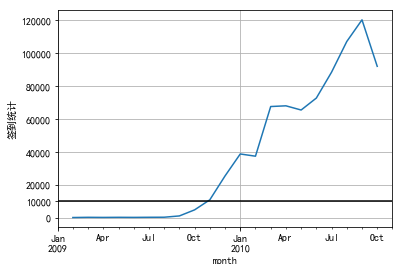

In [18]:
demos.groupby('month')['user'].count().plot()# 由于个人电脑性能有限，这里取了80万数据进行分析
plt.axhline(10000,color='k')
plt.yticks([0,10000,20000,40000,60000,80000,100000,120000])
plt.ylabel('签到统计')
plt.grid()
plt.savefig('每月统计',dpi=300,bbox_inches='tight')

* 2009.2~2009.9月，网站签到人数较低
* 从2009.10月起，网站签到人数迅速增加

In [19]:
#每月24小时中，用户签到数统计
groupdays=demos.groupby('month')['hour'].value_counts()# 每天各个时段签到数统计
group_month_hour = pd.DataFrame(groupdays).rename(columns={'hour':'counts'}).reset_index()
group_month_hour.head()

,month,hour,counts
0,2009-02-01,5,1
1,2009-02-01,18,1
2,2009-03-01,18,20
3,2009-03-01,22,15
4,2009-03-01,19,12


In [20]:
group_month_hour.month.value_counts().index.values

array(['2009-09-01T00:00:00.000000000', '2010-07-01T00:00:00.000000000',
       '2010-06-01T00:00:00.000000000', '2010-05-01T00:00:00.000000000',
       '2009-11-01T00:00:00.000000000', '2009-10-01T00:00:00.000000000',
       '2010-09-01T00:00:00.000000000', '2010-10-01T00:00:00.000000000',
       '2010-08-01T00:00:00.000000000', '2010-02-01T00:00:00.000000000',
       '2010-01-01T00:00:00.000000000', '2009-12-01T00:00:00.000000000',
       '2010-04-01T00:00:00.000000000', '2010-03-01T00:00:00.000000000',
       '2009-08-01T00:00:00.000000000', '2009-06-01T00:00:00.000000000',
       '2009-07-01T00:00:00.000000000', '2009-05-01T00:00:00.000000000',
       '2009-04-01T00:00:00.000000000', '2009-03-01T00:00:00.000000000',
       '2009-02-01T00:00:00.000000000'], dtype='datetime64[ns]')

In [21]:
sns.color_palette('Blues')

[(0.8584083044982699, 0.9134486735870818, 0.9645674740484429),
 (0.7309496347558632, 0.8394771241830065, 0.9213225682429834),
 (0.5356862745098039, 0.746082276047674, 0.8642522106881968),
 (0.32628988850442137, 0.6186236063052672, 0.802798923490965),
 (0.16696655132641292, 0.48069204152249134, 0.7291503267973857),
 (0.044059976931949255, 0.3338869665513264, 0.6244521337946944)]

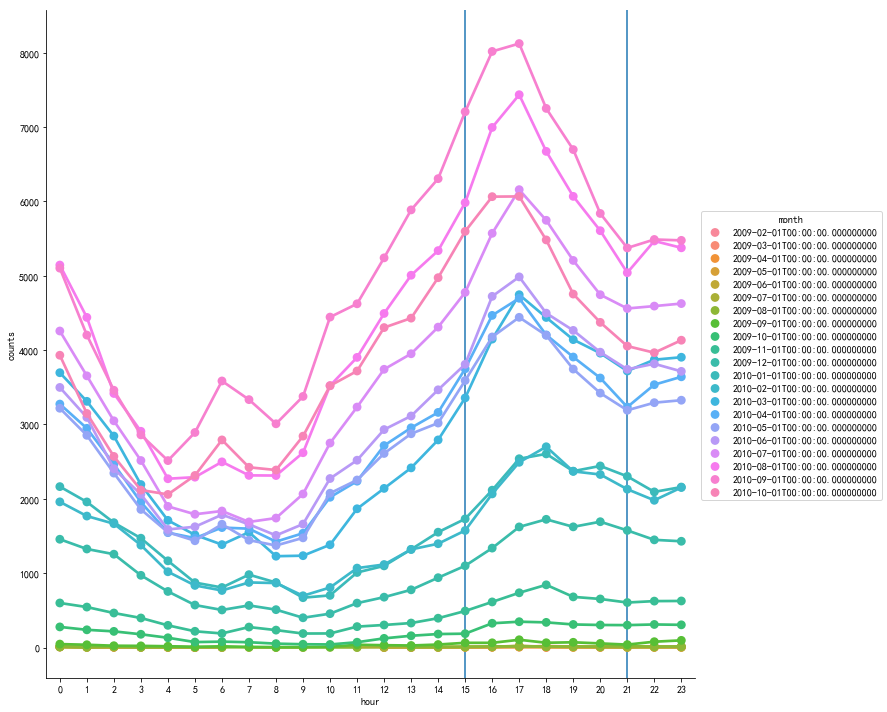

In [22]:
sns.factorplot(x='hour',y='counts',hue='month',data=group_month_hour,size=10)
plt.axvline(15)
plt.axvline(21)
plt.savefig('每月小时统计',dpi=300,bbox_inches='tight')

* 网站用户签到数，每月都在增加
* 每月中，同一时间段，用户签到数，呈现递增趋势
* 大部分用户签到时间集中在，15：00到21：00

In [23]:
#nets.to_csv('nets.csv',index=False)

In [24]:
demos.head()

,user,check_in_time,latitude,longitude,location_id,hour,day,month,labels
5746745,138089,2010-02-24T03:57:24Z,34.740714,-82.239352,59499,3,2010-02-24,2010-02-01,半夜
6047297,154388,2010-08-23T14:06:34Z,35.955580,-83.928552,14315,14,2010-08-23,2010-08-01,中午
5833372,142302,2010-06-19T12:10:05Z,13.909485,100.538512,1305225,12,2010-06-19,2010-06-01,中午
4603548,102896,2010-10-15T10:23:53Z,59.316827,18.055815,63472,10,2010-10-15,2010-10-01,中午
5870898,143911,2010-06-05T14:06:50Z,50.907364,6.970436,472994,14,2010-06-05,2010-06-01,中午


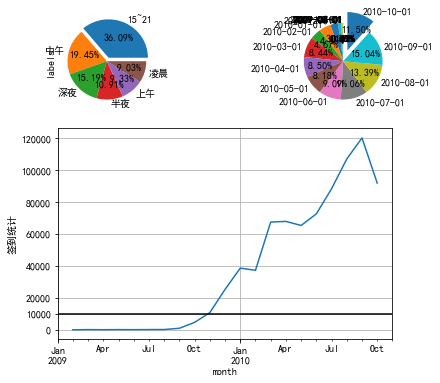

In [274]:
fig=plt.figure(figsize=(12,12))
plt.subplot2grid((3,3),(0,0),colspan=1)

labels=demos.labels.value_counts(normalize=True)
labels.plot.pie(autopct='%.2f%%',figsize=(6,6),explode = [0.1 if i=='15~21' else 0 for i in list(labels.index.values)])
# plt.savefig('饼图',dpi=300,bbox_inches='tight')


plt.subplot2grid((3,3),(0,2),colspan=1)
counts=demos.groupby('month').count()[['user']]
counts['counts']=counts.apply(lambda x:x/x.sum(),axis=0)
a=[.0]*(len(counts)-1)
a.append(0.3)
explodes=a
labels=list(counts.reset_index().month.apply(lambda x:x.strftime('%Y-%m-%d')))
counts.counts.plot.pie(autopct='%.2f%%',figsize=(6,6),startangle=90,labels=labels,explode=explodes)
plt.ylabel('')


# ax2=fig.add_subplot(2,1,2)
plt.subplot2grid((3,3),(1,0),colspan=3,rowspan=3)
demos.groupby('month')['user'].count().plot()# 由于个人电脑性能有限，这里取了80万数据进行分析
plt.axhline(10000,color='k')
plt.yticks([0,10000,20000,40000,60000,80000,100000,120000])
plt.ylabel('签到统计')
plt.grid()
plt.savefig('饼图+统计',dpi=300,bbox_inches='tight')

In [176]:
counts=demos.groupby('month').count()[['user']]
counts['counts']=counts.apply(lambda x:x/x.sum(),axis=0)

In [177]:
counts['counts']=counts['counts'].map(lambda x:'%.2f'%(x*100)).astype(float)

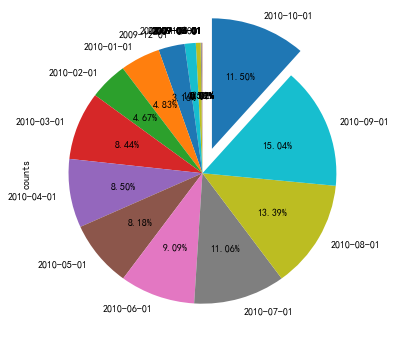

In [263]:
a=[.0]*(len(counts)-1)
a.append(0.2)
explodes=a
labels=list(counts.reset_index().month.apply(lambda x:x.strftime('%Y-%m-%d')))
counts.counts.plot.pie(autopct='%.2f%%',figsize=(6,6),startangle=90,labels=labels,explode=explodes)

In [165]:
list(counts.reset_index().month.apply(lambda x:x.strftime('%Y-%m-%d')))[0]

'2009-02-01'